<a href="https://colab.research.google.com/github/huune2k/BTVN_AI_8-8-2022/blob/main/FashionMinist_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from tensorflow.keras.optimizers import RMSprop
from keras.backend import categorical_crossentropy

In [ ]:
(x_train, y_train),(x_test,y_test)= fashion_mnist.load_data()
x=x_test

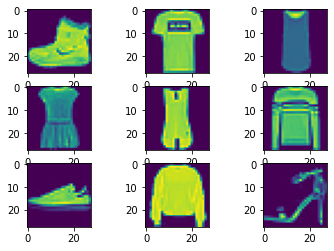

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)


(60000, 10)
(10000, 10)


In [ ]:
model = Sequential()

model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=RMSprop(),
    loss= categorical_crossentropy,
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(x_train, y_train, batch_size =128 , epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 9s 19ms/step - loss: 0.5622 - accuracy: 0.7970 - val_loss: 0.4549 - val_accuracy: 0.8365
Epoch 2/10
469/469 [==============================] - 9s 18ms/step - loss: 0.4046 - accuracy: 0.8521 - val_loss: 0.3950 - val_accuracy: 0.8574
Epoch 3/10
469/469 [==============================] - 9s 18ms/step - loss: 0.3666 - accuracy: 0.8673 - val_loss: 0.3759 - val_accuracy: 0.8648
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.3495 - accuracy: 0.8741 - val_loss: 0.3798 - val_accuracy: 0.8665
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3377 - accuracy: 0.8790 - val_loss: 0.3678 - val_accuracy: 0.8728
Epoch 6/10
469/469 [==============================] - 8s 18ms/step - loss: 0.3284 - accuracy: 0.8837 - val_loss: 0.3607 - val_accuracy: 0.8718
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3213 - accuracy: 0.8856 - val_loss: 0.3958 - val_accuracy: 0.8677

In [ ]:
model.save('final1.sav')
score = model.evaluate(x_test,y_test,verbose=1)

INFO:tensorflow:Assets written to: final1.sav/assets
313/313 [==============================] - 1s 3ms/step - loss: 0.3710 - accuracy: 0.8853


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


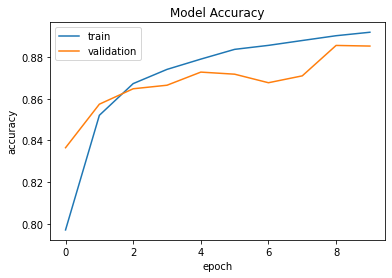

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
# label=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

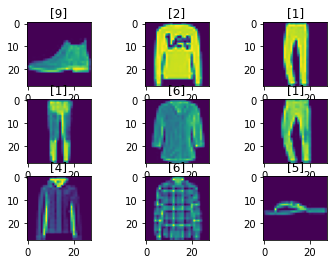

In [ ]:

y_pred = model.predict(x_test)
# plt.imshow(x_train[0:9])
# print(y_pre[0:9])
# y_pred = y_pre[0:9]
#   index = y_pred[i].max
#   y_pred[index]=1
#   y_pred
# print(y_pred[0])
# print(np.argmax(y_pred[0]))
for i in range (9):
  plt.subplot(330+i+1)
  plt.imshow(x[i])
  plt.title([np.argmax(y_pred[i])])
plt.show()